Elaborado com base em: https://www.youtube.com/channel/UCd3ThZLzVDDnKSZMsbK0icg

http://facebook.com/cienciadosdadosbr






In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color='blue'>Processo de Machine Learning - Previsão de Diabetes</font>


## 1. Definição do Problema de Negócio

Criar um modelo preditivo que seja capaz de **prever se uma pessoa pode ou não desenvolver diabetes**. Para isso, usaremos dados históricos de pacientes, disponíveis no dataset abaixo.

Dataset: Pima Indians Diabetes Data Set
http://archive.ics.uci.edu/ml/datasets/diabetes

Este dataset descreve os registros médicos entre pacientes do Pima Indians e cada registro está marcado se o paciente desenvolveu ou não diabetes. 

### Informações sobre os atributos:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

##2.  Extraindo e Carregando os Dados

In [4]:
# Carregando arquivo csv usando Pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] #Renomenado melhor as colunas
dados = pd.read_csv(arquivo, names = colunas)
print(dados.shape)

(768, 9)


## 3. Análise Exploratória de Dados

### Estatística Descritiva

In [5]:
# Visualizando as primeiras 20 linhas
dados.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
# Visualizando as dimensões
dados.shape

(768, 9)

In [7]:
# Tipo de dados de cada atributo
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
# Sumário estatístico
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Distribuição das classes
dados.groupby('class').size() # Verifica se as classes estão muito desbalanceadas *(500 ~~0 s/ diab ; 268~~1 diab)

class
0    500
1    268
dtype: int64

A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

In [10]:
# Correlação de Pearson
dados.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Visualização da distribuição dos dados com Matplotlib

In [11]:
import matplotlib.pyplot as plt
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

Com o histograma podemos rapidamente avaliar a distribuição de cada atributo. Os histogramas agrupam os dados em bins e fornecem uma contagem do número de observações em cada bin. Com o histograma, você pode rapidamente verificar a simetria dos dados e se eles estão em distribuição normal ou não. Isso também vai ajudar na identificação dos outliers.

Podemos ver que os atributos age, pedi e test possuem uma distribuição exponencial. Podemos ver que as colunas mass e press possuem uma distribuição normal.

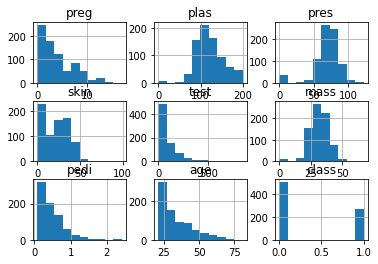

In [12]:
# Histograma Univariado
dados.hist()
plt.show()

Os Density Plots são outra forma de visualizar a distribuição dos dados para cada atributo. O plot é como uma espécie de histograma abstrato com uma curva suave através do topo dos bins de um histograma. Pode ser mais fácil identificar a distribuição dos dados usando um density plot.

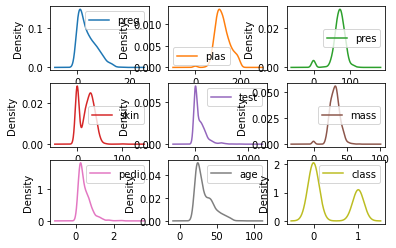

In [13]:
# Density Plot Univariado
dados.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

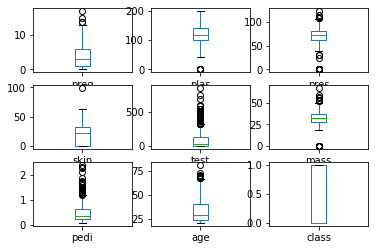

In [14]:
# Box and Whisker Plots
dados.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

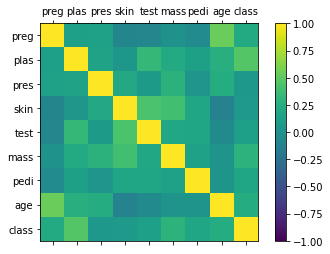

In [15]:
# Matriz de Correlação com nomes das variáveis
correlations = dados.corr()

# Plot
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

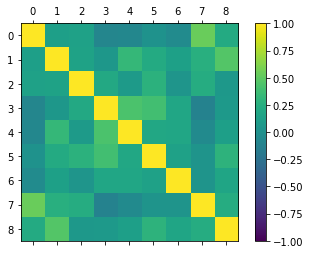

In [16]:
# Matriz de Correlação genérica
correlations = dados.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

### Visualização com Seaborn

In [18]:
import seaborn as sns

In [ ]:
# Pairplot
sns.pairplot(dados)

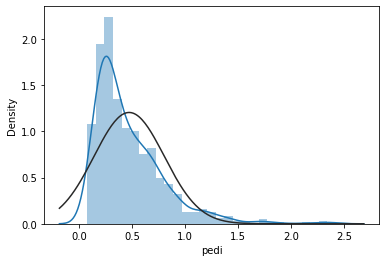

In [21]:
from scipy import stats
sns.distplot(dados.pedi, fit = stats.norm); # Curva preta representa comportamento da curva normal

## <font color='black'>4. Pré-Processamento - Preparando os Dados para Machine Learning</font>

Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.


## Normalização - Método 1

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [11]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:8]
Y = array[:,8]

# Gerando a nova escala (normalizando os dados) // MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Gerando os dados normalizados // Normalizer
#    útil quando temos datasets esparsos (com muitos zeros) e atributos com escala 
#   muito variada (KNN e RN)
scaler2 = Normalizer().fit(X)
normalizedX = scaler2.transform(X)

# Gerando o novo padrão // StandardScaler
#   útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, 
#  como regressão linear, regressão logística
# Funciona bem quando os dados já estão na mesma escala

scaler3 = StandardScaler().fit(X)
standardX = scaler3.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", normalizedX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]
 [0.         0.5963863  0.17412739 0.15236146 0.73133502 0.18762226
  0.00996009 0.14365509]]


## Método Ensemble para Seleção de Variáveis

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Bagged Decision Trees, como o algoritmo RandomForest (esses são chamados de Métodos Ensemble), podem ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo.

In [3]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
print(dados.columns[0:8])
print(modelo.feature_importances_) # Quanto maior o score, maior a importância do atributo.

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
[0.10967285 0.23158705 0.09882782 0.0795917  0.07855086 0.14390311
 0.11577881 0.1420878 ]


## Amostragem - Resampling

### Dados de Treino e de Teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [15]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho das amostras
teste_size = 0.33             # 70/30 

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

#############################################################################
#             Regressão Logistica
# Ideal para conjuntos de dados muito grandes

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

############################################################################
#               Cross Validation   
#Util para avaliar a performance de um modelo com menos variância

# Definindo os valores para os folds
num_folds = 20
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste para Regressão Logistica: %.3f%%" % (result * 100.0))
print("Acurácia nos Dados de Teste para Cross Validation: %.3f%%" % (resultado.mean() * 100.0))

Acurácia nos Dados de Teste para Regressão Logistica: 78.740%
Acurácia nos Dados de Teste para Cross Validation: 77.729%


## 5. Aprendizagem - Algoritmos para Problemas de Classificação

Verificar qual algoritmo tem melhor perfomance ( pela metrica da acuracia)

## Seleção do Modelo Preditivo

LR: 0.773428 (0.053375)
LDA: 0.773462 (0.051592)
NB: 0.755178 (0.042766)
KNN: 0.726555 (0.061821)
CART: 0.690021 (0.061330)
SVM: 0.760424 (0.052931)
XGBoost: 0.766866 (0.071100)


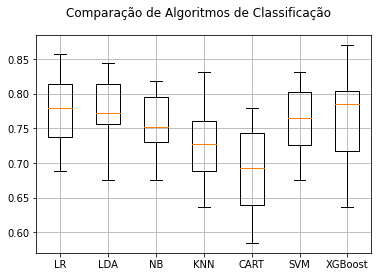

In [27]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression # Algoritmo Linear Distribuição Normal
from sklearn.tree import DecisionTreeClassifier #Algoritmo Não-Linear Arvore Binaria
from sklearn.neighbors import KNeighborsClassifier #Algoritmo Não-Linear Utiliza métrica de distância 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Algoritmo Linear
from sklearn.naive_bayes import GaussianNB # Algoritmo Não-Linear Calculo de Probabilidade
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('XGBoost', XGBClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
plt.grid(True)
ax.set_xticklabels(nomes)
plt.show()

In [6]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(X_treino, y_treino)

# Pront do modelo
print(modelo)

# Fazendo previsões
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Acurácia: 77.95%


## Avaliando a Performance

As métricas que você escolhe para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.

Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados. A função cross_validation.cross_val_score() será usada para avaliar a performance.

### Métricas para Algoritmos de Classificação

https://scikit-learn.org/stable/modules/model_evaluation.html

In [25]:
# Acurácia: Número de previsões corretas. É útil apenas quando existe o mesmo número de observações em cada classe.

# Curva ROC_AUC :  Essa é uma métrica de performance para classificação binária

#Confusion Matrix: Permite verificar a acurácia em um formato de tabela

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
################################### Matriz de Confusao ###############

# Definindo o tamanho do conjunto de dados
teste_size = 0.33


# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

############### Relatório de Classificação ######
report = classification_report(Y_teste, previsoes)


# Print dos resultados
print("Acurácia: %.3f%%" % (resultado.mean() * 100))
print("AUC: %.3f%%" % (resultado2.mean() * 100))
print("Matriz de confusão:")
print( matrix)
print("")
print(report)

Acurácia: 77.734%
AUC: 82.407%
Matriz de confusão:
[[142  20]
 [ 34  58]]

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



## Otimização do Modelo - Ajuste de Hyperparâmetros

### Grid Search Parameter Tuning

Este método realiza metodicamente combinações entre todos os parâmetros do algoritmo, criando um grid. Vamos experimentar este método utilizando o algoritmo de Regressão Logística. 

In [57]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 77.610
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Random Search Parameter Tuning

Este método gera amostras dos parâmetros dos algoritmos a partir de uma distribuição randômica uniforme para um número fixo de iterações. Um modelo é construído e testado para cada combinação de parâmetros.

In [58]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores que serão testados
seed = 7
iterations = 14

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(X, Y)

# Print dos resultados
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Acurácia: 77.610
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# 6. Salvando o resultado do seu trabalho (Deploy?)

In [29]:
# Salvando o resultado do seu trabalho
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/Previsão Diabetes/pima-data.csv'

colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

# Salvando o modelo
arquivo = 'modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

Modelo salvo!
Modelo carregado!
Acurácia: 78.740


# Fim